## Análisis de la Expansión del COVID-19 en la Ciudad de Buenos Aires
<br> 

### Universidad Tecnológica Nacional - Reg. Buenos Aires
<br>

### Ingeniería Industrial - Ciencia de Datos (clusterAI)
#### Noviembre, 2020
<br>
<br>

#### Autores:
<br>

##### Demaestri, Juan Ignacio
##### Gutiérrez, Manuel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
geopandas_is_installed = True
isFirst =True
#install geopandas
if (geopandas_is_installed == True) :
    import geopandas as gps

## Datasets

In [3]:
covid_df = pd.read_csv('datasets\\01_casos_covid19.csv')
#Extracted from: https://datos.gob.ar/dataset/salud-covid-19-casos-registrados-republica-argentina
#Last Update: 04/nov/2020


c:\devapps\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
covid_df.shape

(680052, 14)

In [5]:
covid_df.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio'],
      dtype='object')

In [6]:
covid_df.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2008595,20AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,21AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,29.0,confirmado,NaN,NaN,NaN,En Investigación
1,2015570,21AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,21AUG2020:00:00:00.000000,CABA,VILLA CRESPO,15.0,femenino,51.0,confirmado,NaN,NaN,NaN,En Investigación
2,2011163,20AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,CABA,COLEGIALES,13.0,masculino,59.0,confirmado,NaN,NaN,NaN,Comunitario
3,1962393,18AUG2020:00:00:00.000000,18AUG2020:00:00:00.000000,18AUG2020:00:00:00.000000,CABA,BARRACAS,4.0,femenino,41.0,confirmado,NaN,NaN,NaN,Contacto
4,1925206,17AUG2020:00:00:00.000000,17AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,73.0,confirmado,NaN,NaN,NaN,Comunitario


In [7]:
if (geopandas_is_installed == True) :
    barrios_caba_map = gps.read_file('datasets\\02_ba_comuna_barrios.json')
    print(barrios_caba_map.shape)
    

(48, 5)


In [8]:
barrios_caba_densidad  = pd.read_csv('datasets\\03_ba_censo_2010.csv')

In [9]:
barrios_caba_densidad.shape

(48, 7)

In [10]:
barrios_caba_densidad.head(10)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.10,20973.41
1,Comuna 1,MONSERRAT,39914,20974,18940,2.20,18159.14
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.03,1338.40
3,Comuna 1,RETIRO,65413,34218,31195,4.53,14450.24
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.29,12784.95
5,Comuna 1,SAN TELMO,20453,10814,9639,1.23,16601.43
6,Comuna 2,RECOLETA,157932,89890,68042,6.29,25100.49
7,Comuna 3,BALVANERA,138926,75653,63273,4.34,31991.01
8,Comuna 3,SAN CRISTOBAL,48611,26283,22328,2.04,23785.65
9,Comuna 4,BARRACAS,89452,46715,42737,7.96,11240.81


In [11]:
if (geopandas_is_installed == True) :
    ba_subte_map =  gps.read_file('datasets\\04_subte_estaciones.json')

In [12]:
clima_caba_df  = pd.read_csv('datasets\\05_MetereologiaCABA.csv')

In [13]:
subte_caba_df  = pd.read_csv('datasets\\06_Subtes2020.csv', delimiter=",")

## EDA - Exploratory Data Analysis

###  (01) COVID Dataset

In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680052 entries, 0 to 680051
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   numero_de_caso       680052 non-null  int64  
 1   fecha_apertura_snvs  680052 non-null  object 
 2   fecha_toma_muestra   678078 non-null  object 
 3   fecha_clasificacion  680052 non-null  object 
 4   provincia            676799 non-null  object 
 5   barrio               381206 non-null  object 
 6   comuna               381206 non-null  float64
 7   genero               680049 non-null  object 
 8   edad                 679647 non-null  float64
 9   clasificacion        680052 non-null  object 
 10  fecha_fallecimiento  7630 non-null    object 
 11  fallecido            7630 non-null    object 
 12  fecha_alta           67576 non-null   object 
 13  tipo_contagio        251485 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 72.6+ MB


In [15]:
# String to Datetime
covid_df.fecha_clasificacion = pd.to_datetime(covid_df.fecha_clasificacion,format='%d%b%Y:%H:%M:%S.%f')
covid_df.fecha_toma_muestra  = pd.to_datetime(covid_df.fecha_toma_muestra,format='%d%b%Y:%H:%M:%S.%f')
covid_df.fecha_alta          = pd.to_datetime(covid_df.fecha_alta,format='%d%b%Y:%H:%M:%S.%f')

In [16]:
covid_df.head(10)

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2008595,20AUG2020:00:00:00.000000,2020-08-20,2020-08-21,Buenos Aires,NaN,NaN,masculino,29.0,confirmado,NaN,NaN,NaT,En Investigación
1,2015570,21AUG2020:00:00:00.000000,2020-08-20,2020-08-21,CABA,VILLA CRESPO,15.0,femenino,51.0,confirmado,NaN,NaN,NaT,En Investigación
2,2011163,20AUG2020:00:00:00.000000,2020-08-10,2020-08-10,CABA,COLEGIALES,13.0,masculino,59.0,confirmado,NaN,NaN,NaT,Comunitario
3,1962393,18AUG2020:00:00:00.000000,2020-08-18,2020-08-18,CABA,BARRACAS,4.0,femenino,41.0,confirmado,NaN,NaN,NaT,Contacto
4,1925206,17AUG2020:00:00:00.000000,2020-08-17,2020-08-20,Buenos Aires,NaN,NaN,masculino,73.0,confirmado,NaN,NaN,NaT,Comunitario
5,1889367,14AUG2020:00:00:00.000000,2020-08-21,2020-08-21,Buenos Aires,NaN,NaN,masculino,30.0,confirmado,NaN,NaN,NaT,Comunitario
6,1944377,18AUG2020:00:00:00.000000,2020-08-18,2020-08-21,CABA,PALERMO,14.0,femenino,35.0,confirmado,NaN,NaN,NaT,Comunitario
7,1971730,19AUG2020:00:00:00.000000,2020-08-19,2020-08-20,CABA,MONSERRAT,1.0,masculino,50.0,confirmado,NaN,NaN,NaT,Comunitario
8,2014573,21AUG2020:00:00:00.000000,2020-08-20,2020-08-20,Buenos Aires,NaN,NaN,masculino,50.0,confirmado,NaN,NaN,NaT,Comunitario
9,2019681,21AUG2020:00:00:00.000000,2020-08-18,2020-08-20,Buenos Aires,NaN,NaN,masculino,34.0,confirmado,NaN,NaN,NaT,Comunitario


In [17]:
#feature extraction - less important features
covid_df = covid_df.iloc[:,[2,3,4,5,6,7,8,9,11,12]]

In [18]:
#dataset filtration - Buenos Aires City
covid_caba_df = covid_df[(covid_df.provincia == 'CABA') & (covid_df.clasificacion == 'confirmado')]

In [19]:
covid_caba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143876 entries, 1 to 680051
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fecha_toma_muestra   143572 non-null  datetime64[ns]
 1   fecha_clasificacion  143876 non-null  datetime64[ns]
 2   provincia            143876 non-null  object        
 3   barrio               140172 non-null  object        
 4   comuna               140172 non-null  float64       
 5   genero               143876 non-null  object        
 6   edad                 143832 non-null  float64       
 7   clasificacion        143876 non-null  object        
 8   fallecido            4797 non-null    object        
 9   fecha_alta           46126 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 12.1+ MB


In [20]:
covid_caba_df.shape

(143876, 10)

In [21]:
covid_caba_df.head(5)

,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fallecido,fecha_alta
1,2020-08-20,2020-08-21,CABA,VILLA CRESPO,15.0,femenino,51.0,confirmado,NaN,NaT
2,2020-08-10,2020-08-10,CABA,COLEGIALES,13.0,masculino,59.0,confirmado,NaN,NaT
3,2020-08-18,2020-08-18,CABA,BARRACAS,4.0,femenino,41.0,confirmado,NaN,NaT
6,2020-08-18,2020-08-21,CABA,PALERMO,14.0,femenino,35.0,confirmado,NaN,NaT
7,2020-08-19,2020-08-20,CABA,MONSERRAT,1.0,masculino,50.0,confirmado,NaN,NaT


In [22]:
covid_caba_df["fecha_toma_muestra"].describe()

<ipython-input-22-ad4a50d36f86>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  covid_caba_df["fecha_toma_muestra"].describe()


count                  143572
unique                    241
top       2020-08-26 00:00:00
freq                     1562
first     2019-07-20 00:00:00
last      2020-10-24 00:00:00
Name: fecha_toma_muestra, dtype: object

In [23]:
covid_caba_df["barrio"].describe()

count     140172
unique        48
top       FLORES
freq       10264
Name: barrio, dtype: object

In [24]:
covid_caba_df.edad.describe()

count    143832.000000
mean         41.412328
std          20.786592
min           0.000000
25%          27.000000
50%          39.000000
75%          54.000000
max         120.000000
Name: edad, dtype: float64

In [25]:
covid_caba_df.describe

<bound method NDFrame.describe of        fecha_toma_muestra fecha_clasificacion provincia        barrio  comuna  \
1              2020-08-20          2020-08-21      CABA  VILLA CRESPO    15.0   
2              2020-08-10          2020-08-10      CABA    COLEGIALES    13.0   
3              2020-08-18          2020-08-18      CABA      BARRACAS     4.0   
6              2020-08-18          2020-08-21      CABA       PALERMO    14.0   
7              2020-08-19          2020-08-20      CABA     MONSERRAT     1.0   
...                   ...                 ...       ...           ...     ...   
680045         2020-08-26          2020-08-26      CABA  VILLA LUGANO     8.0   
680046         2020-08-20          2020-08-20      CABA  MONTE CASTRO    10.0   
680049         2020-08-21          2020-08-21      CABA      PATERNAL    15.0   
680050         2020-08-12          2020-08-12      CABA      FLORESTA    10.0   
680051         2020-08-18          2020-08-18      CABA     BALVANERA     3

c:\devapps\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


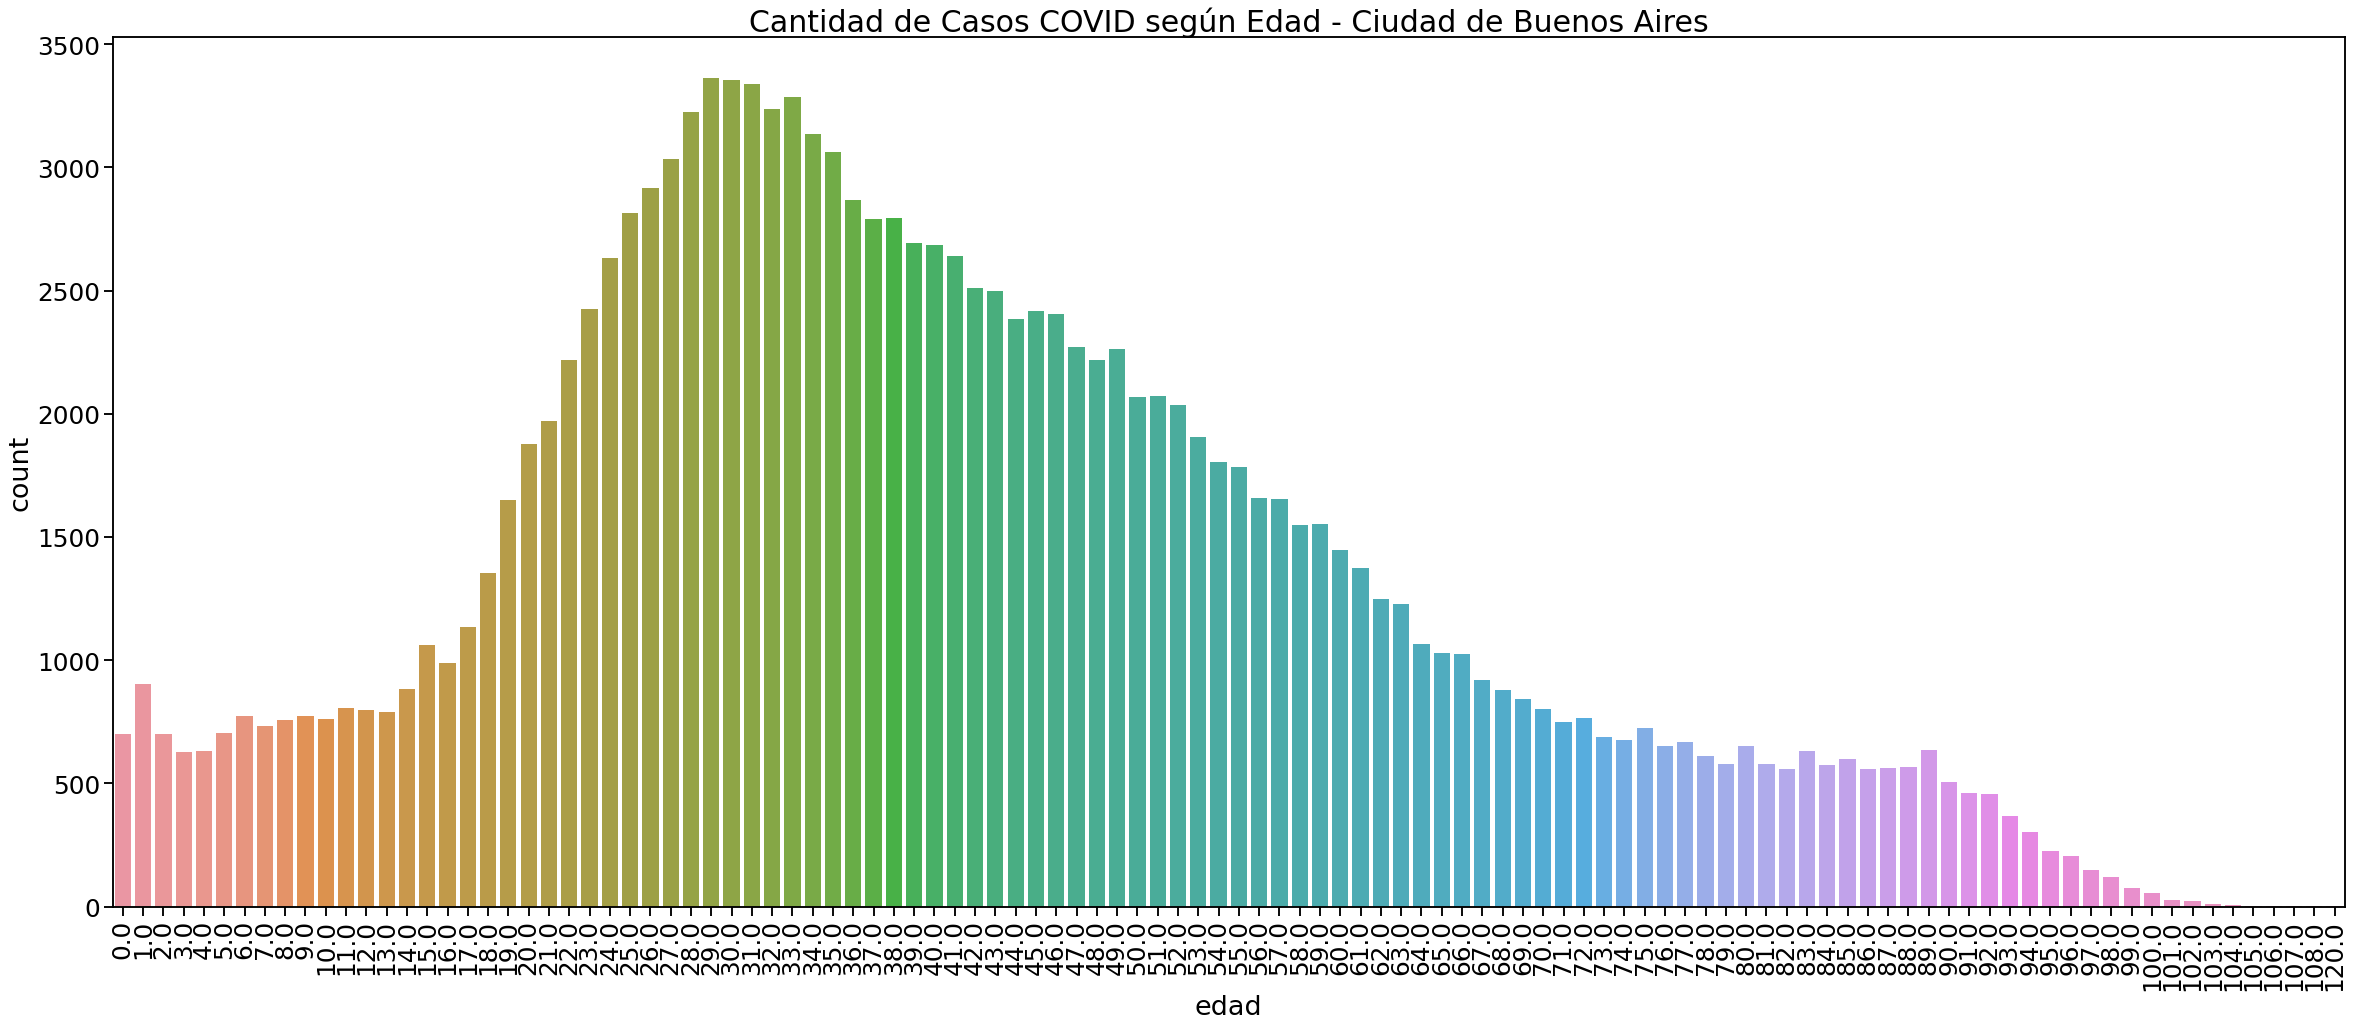

In [26]:
sns.set_context("talk", font_scale=1.5)
plt.figure(figsize=(40,16))
sns.countplot(covid_caba_df.edad)
plt.title("Cantidad de Casos COVID según Edad - Ciudad de Buenos Aires", size=30)
plt.xticks(rotation=90)
plt.show()

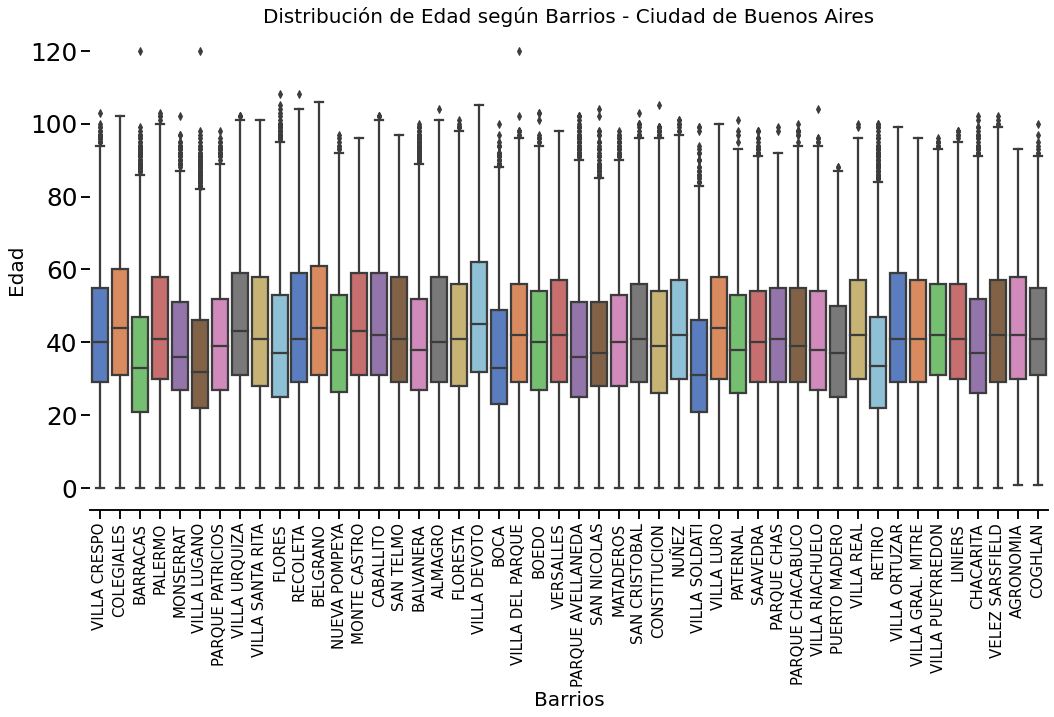

In [27]:
g = sns.catplot(x="barrio",y="edad",
                data=covid_caba_df, 
                kind="box",
                palette = "muted",
                height = 8 ,aspect=2)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90, fontsize=15)
plt.xlabel("Barrios",size = 20)
plt.ylabel("Edad",size = 20)
plt.title('Distribución de Edad según Barrios - Ciudad de Buenos Aires',size = 20)
plt.show()

In [28]:
#Agrupo a los infectados por barrios
group_covidBybarrio_df = covid_caba_df.groupby(["barrio"])["barrio"].count().reset_index(name='casos')

In [29]:
group_covidBybarrio_df.head()

,barrio,casos
0,AGRONOMIA,388
1,ALMAGRO,6217
2,BALVANERA,9003
3,BARRACAS,7294
4,BELGRANO,4215


In [30]:
group_covidBybarrio_df = group_covidBybarrio_df.sort_values(by="casos", ascending=False)

### (03) Dataset CABA densidad

In [31]:
barrios_caba_densidad.head(48)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.10,20973.41
1,Comuna 1,MONSERRAT,39914,20974,18940,2.20,18159.14
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.03,1338.40
3,Comuna 1,RETIRO,65413,34218,31195,4.53,14450.24
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.29,12784.95
5,Comuna 1,SAN TELMO,20453,10814,9639,1.23,16601.43
6,Comuna 2,RECOLETA,157932,89890,68042,6.29,25100.49
7,Comuna 3,BALVANERA,138926,75653,63273,4.34,31991.01
8,Comuna 3,SAN CRISTOBAL,48611,26283,22328,2.04,23785.65
9,Comuna 4,BARRACAS,89452,46715,42737,7.96,11240.81


In [32]:
barrios_covid_densidad = barrios_caba_densidad.merge(group_covidBybarrio_df, left_on='barrio', right_on='barrio')


In [33]:
barrios_covid_densidad.head(5)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional,casos
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.10,20973.41,3017
1,Comuna 1,MONSERRAT,39914,20974,18940,2.20,18159.14,2339
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.03,1338.40,658
3,Comuna 1,RETIRO,65413,34218,31195,4.53,14450.24,4521
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.29,12784.95,1925


In [34]:
barrios_covid_densidad['densidad_covid'] = (barrios_covid_densidad.casos / barrios_covid_densidad.superficie)

In [35]:
barrios_covid_densidad = barrios_covid_densidad.sort_values(by=['densidad_covid'], ascending=False)

In [36]:
filter_covid_densidad = barrios_covid_densidad.iloc[:,[1,6,8]]

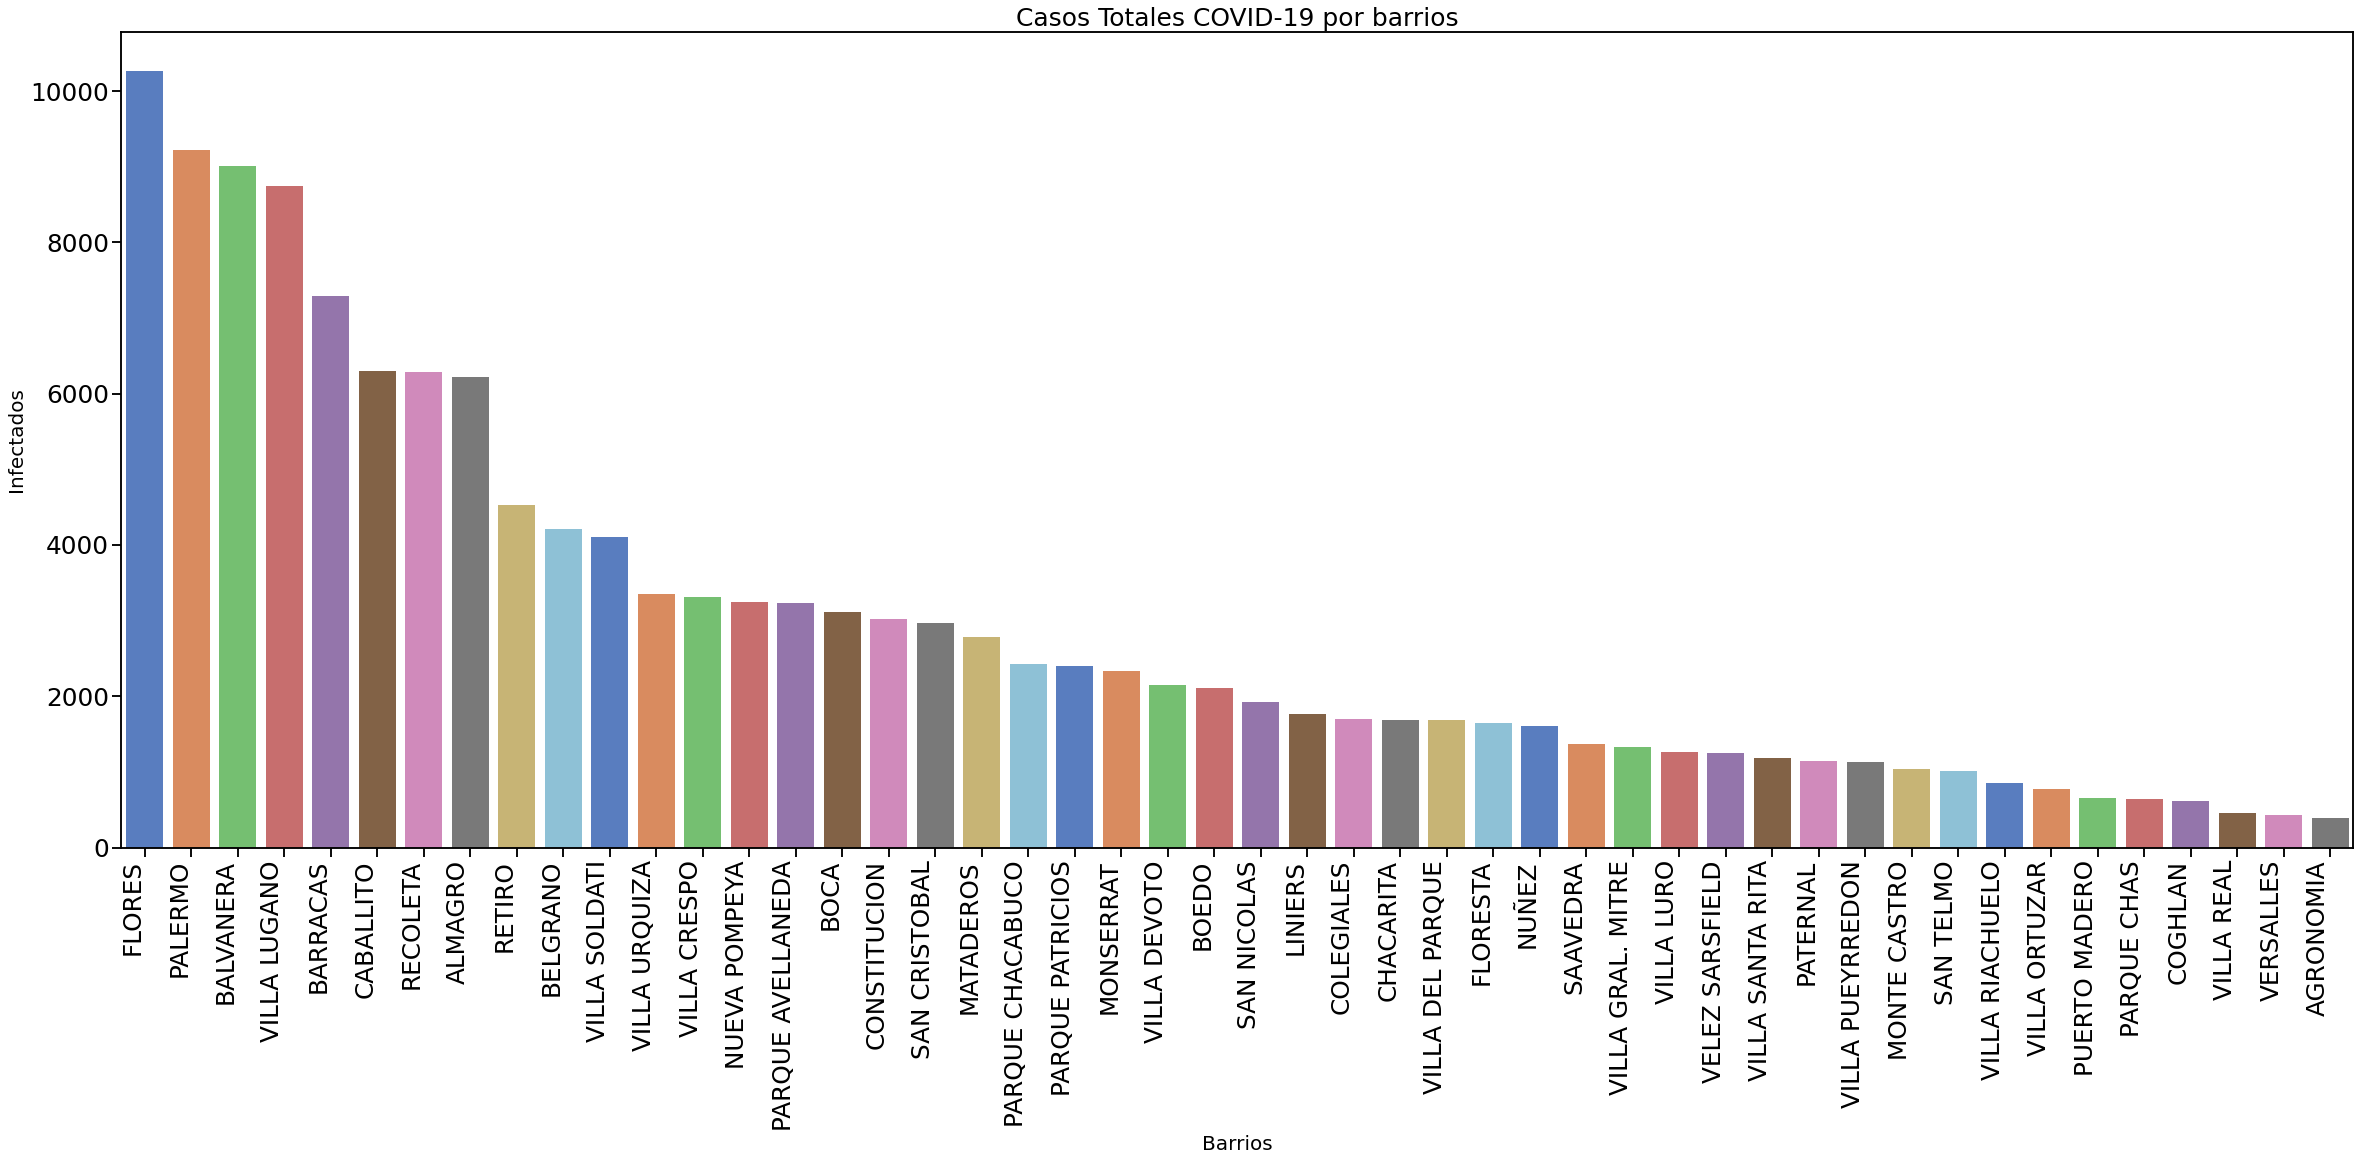

In [37]:

plt.figure(figsize=(40,15))
g = sns.barplot(x="barrio",y="casos",data=group_covidBybarrio_df,
                  palette = "muted")

g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Casos Totales COVID-19 por barrios', size = 25)
plt.xlabel("Barrios", size = 20)
plt.ylabel("Infectados", size = 20)
plt.show()

In [38]:
barrios_caba_densidad = barrios_caba_densidad.sort_values(by=['densidad_pobacional'], ascending=False)

<ipython-input-39-17f29ae52314>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 20)


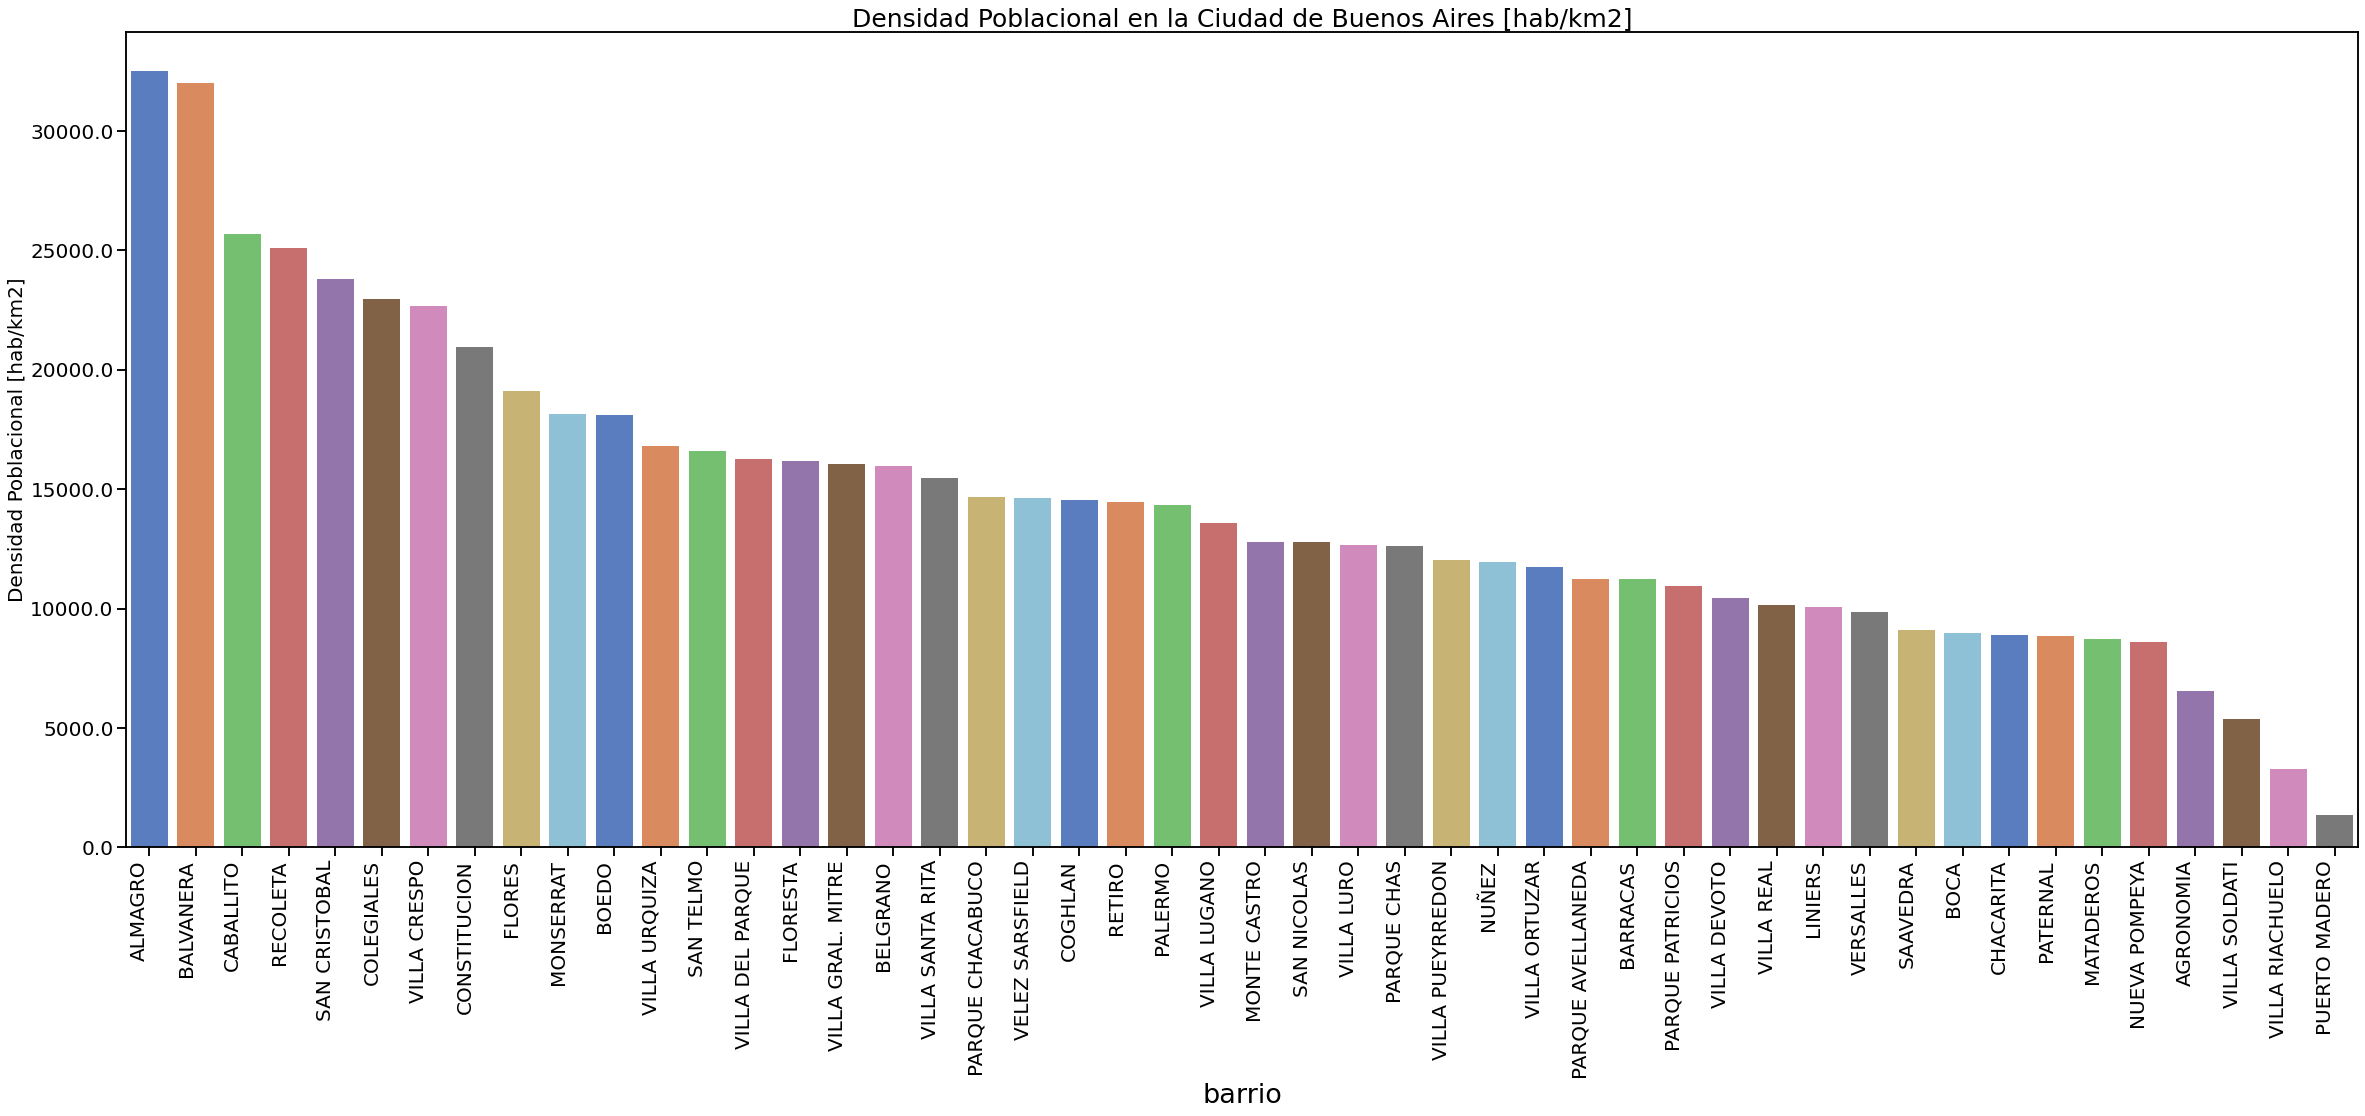

In [39]:

plt.figure(figsize=(40,15))
g = sns.barplot(y="densidad_pobacional",x="barrio", data=barrios_caba_densidad,
                  palette = "muted")

plt.title('Densidad Poblacional en la Ciudad de Buenos Aires [hab/km2]', size = 25)
#plt.xlabel("Barrios", size = 30)
plt.ylabel("Densidad Poblacional [hab/km2]", size = 20)
g.set_yticklabels(g.get_yticks(), size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", size=20)
plt.show()

In [40]:
barrios_covid_densidad.columns

Index(['comuna', 'barrio', 'habitantes', 'mujer', 'varon', 'superficie',
       'densidad_pobacional', 'casos', 'densidad_covid'],
      dtype='object')

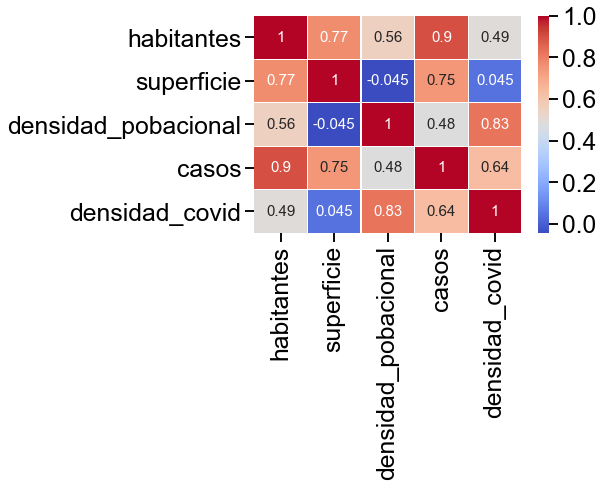

In [41]:
barrios_covid_correlación = barrios_covid_densidad[['habitantes', 'superficie',
       'densidad_pobacional', 'casos', 'densidad_covid']]
sns.heatmap(data=barrios_covid_correlación.corr(), linecolor="white", cbar=True, annot=True, 
            cmap='coolwarm',linewidths=0.1, annot_kws={"size":15})
sns.set(font_scale=1)


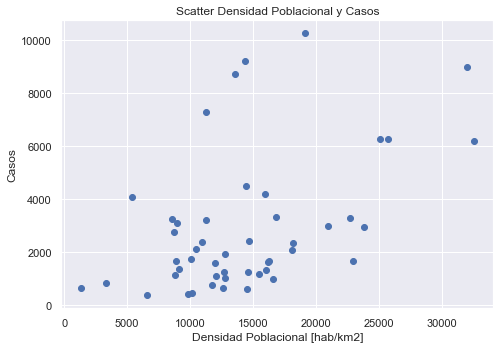

In [42]:
fig=plt.figure()
y1=barrios_covid_densidad.densidad_pobacional
y2=barrios_covid_densidad.casos
ax=fig.add_axes([0,0,1,1])
ax.scatter(y1, y2, color='b')

ax.set_xlabel('Densidad Poblacional [hab/km2]')
ax.set_ylabel('Casos')
ax.set_title('Scatter Densidad Poblacional y Casos')
plt.show()

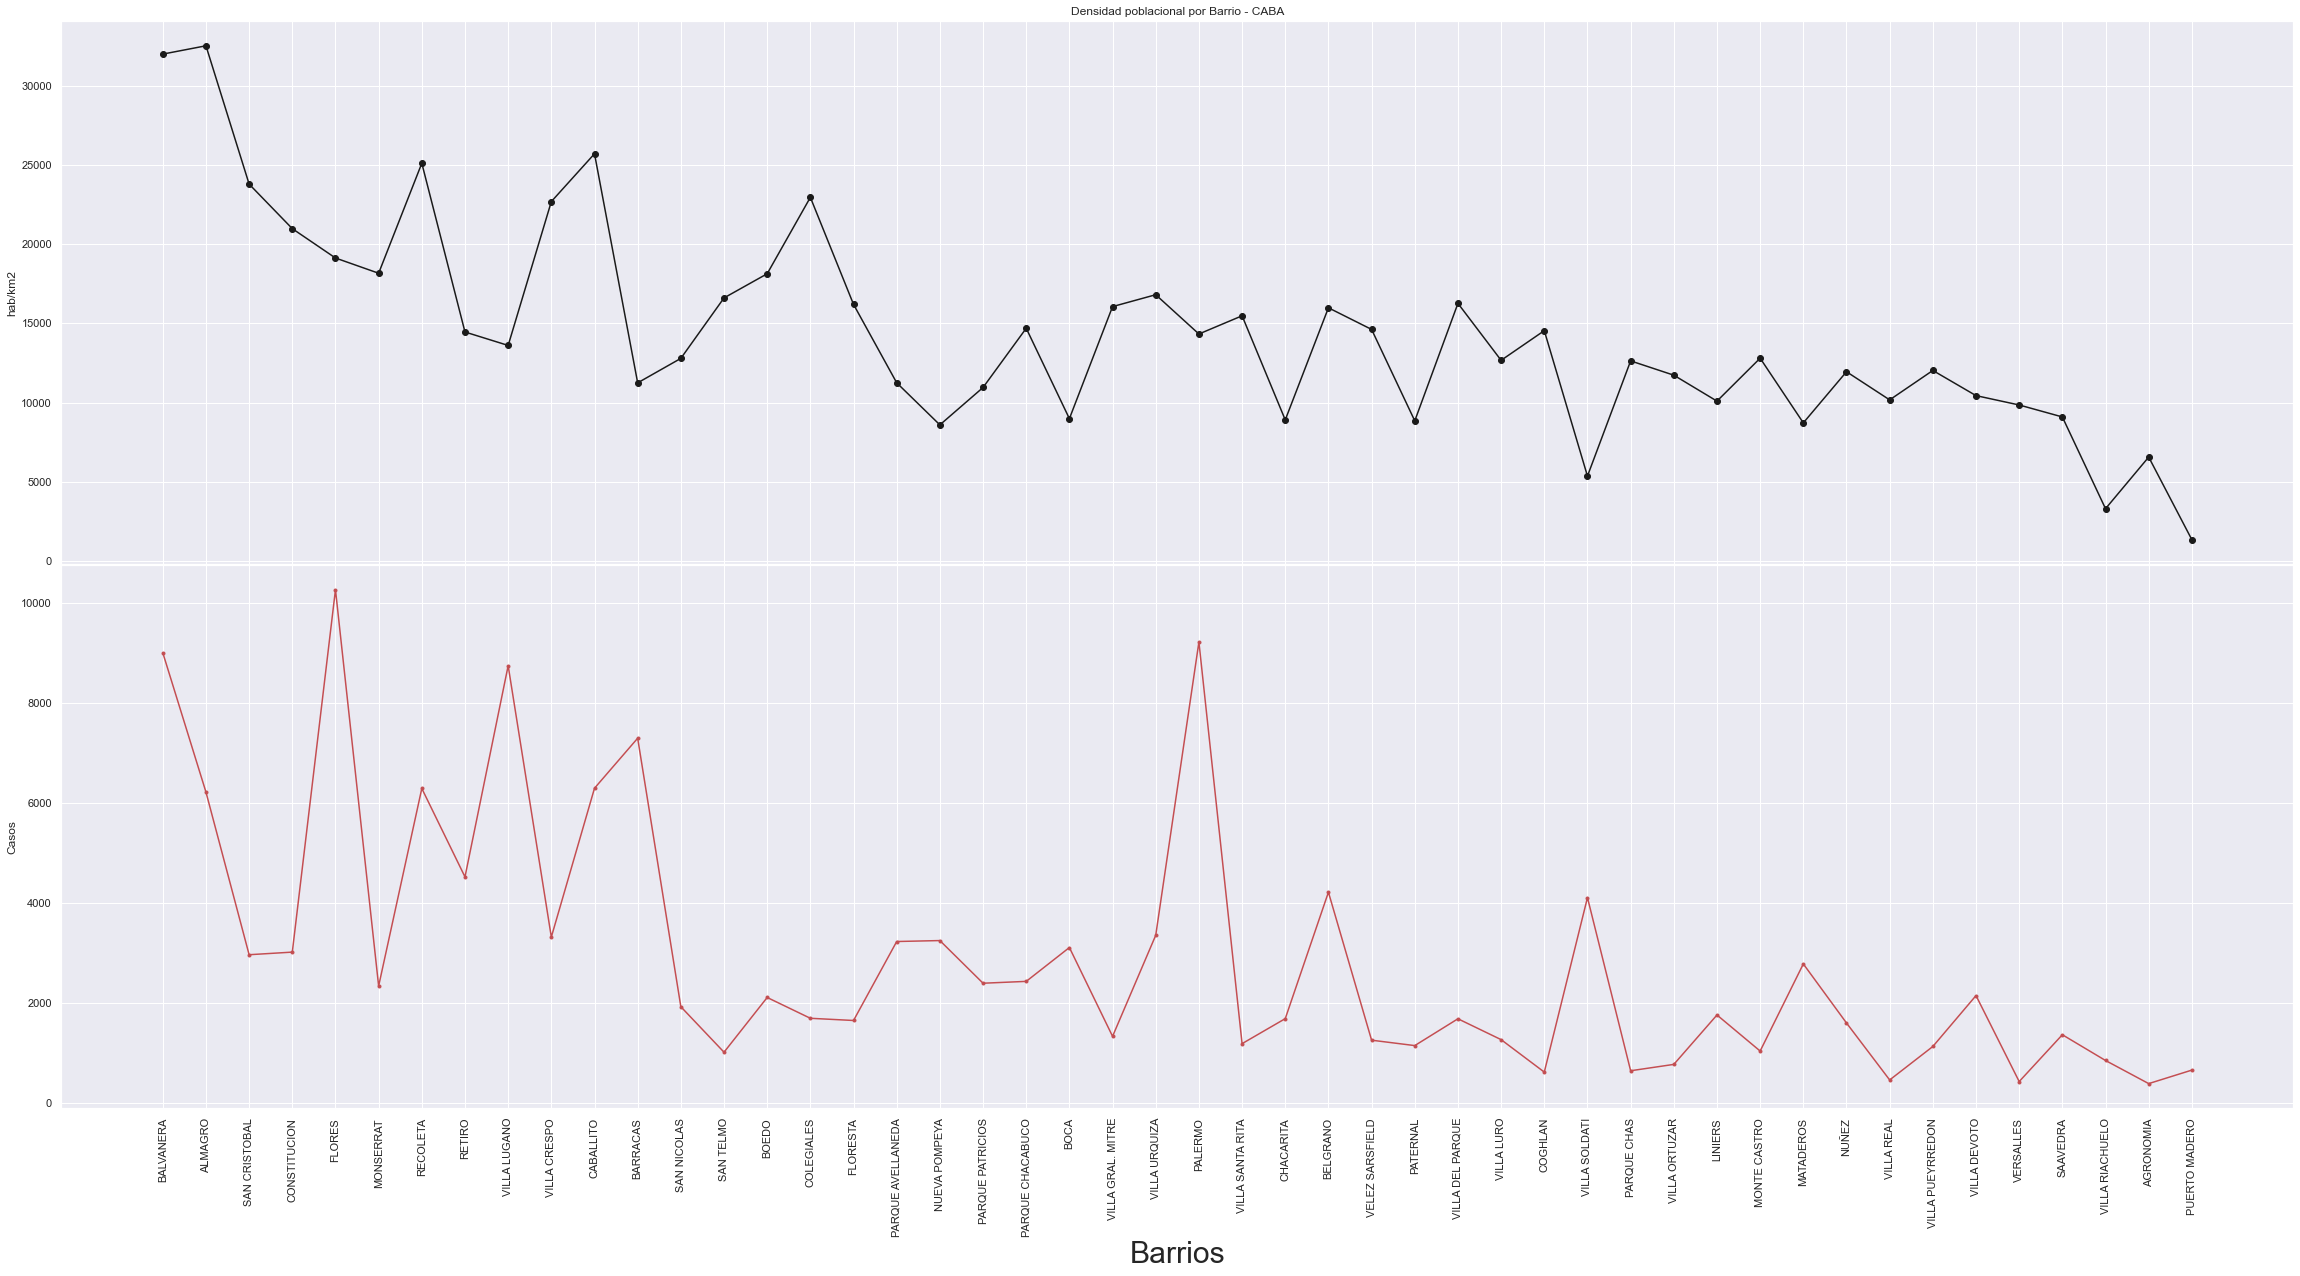

In [43]:

x = barrios_covid_densidad.barrio
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(40,20))
y1=barrios_covid_densidad.densidad_pobacional
y2=barrios_covid_densidad.casos
y3=barrios_covid_densidad.densidad_covid
ax1.plot(x, y1, 'ko-')
ax1.set(title='Densidad poblacional por Barrio - CABA', ylabel='hab/km2')
ax2.plot(x, y2, 'r.-')
ax2.set(ylabel='Casos')
#ax3.plot(x, y3, 'g.-')
#ax3.set(xlabel='Barrio', ylabel='Casos COVID/km2')
plt.xlabel("Barrios", size = 30)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = .001)
plt.show()

In [44]:
filter_covid_densidad.head(5)

,barrio,densidad_pobacional,densidad_covid
7,BALVANERA,31991.01,2074.423963
13,ALMAGRO,32515.09,1535.061728
8,SAN CRISTOBAL,23785.65,1453.431373
0,CONSTITUCION,20973.41,1436.666667
16,FLORES,19120.95,1194.877765


### (05) Dataset Clima CABA

In [45]:
clima_caba_df.head(15)

,Fecha,tMax,tMin,tProm,Humedad,vVel,vDir,pMax,pMin,pProm
0,1/1/2020,26.3,19.3,22.80,77,28,Sudeste,1009.9,1015.3,1012.60
1,2/1/2020,28.5,18.2,23.35,76,23,Sur,1014.8,1018.7,1016.75
2,3/1/2020,29.2,20.5,24.85,72,18,Sudoeste,1015.4,1021.0,1018.20
3,4/1/2020,29.5,21.6,25.55,60,35,Norte,1007.9,1015.8,1011.85
4,5/1/2020,31.0,20.1,25.55,62,26,Calma,998.8,1007.7,1003.25
5,6/1/2020,28.8,18.3,23.55,54,66,Sudoeste,1000.1,1006.7,1003.40
6,7/1/2020,31.1,16.6,23.85,42,39,Oeste,1004.8,1008.8,1006.80
7,8/1/2020,32.0,21.6,26.80,47,39,Norte,1001.7,1008.3,1005.00
8,9/1/2020,30.3,22.1,26.20,57,41,Sur,1001.7,1009.4,1005.55
9,10/1/2020,32.5,20.2,26.35,60,24,Calma,1007.5,1010.3,1008.90


In [46]:
# Convierto tipo de dato string a datetime
clima_caba_df.Fecha = pd.to_datetime(clima_caba_df.Fecha,format='%d/%m/%Y')

In [47]:
clima_caba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    302 non-null    datetime64[ns]
 1   tMax     302 non-null    float64       
 2   tMin     302 non-null    float64       
 3   tProm    302 non-null    float64       
 4   Humedad  302 non-null    int64         
 5   vVel     302 non-null    int64         
 6   vDir     302 non-null    object        
 7   pMax     302 non-null    float64       
 8   pMin     302 non-null    float64       
 9   pProm    302 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 23.7+ KB


## Dataset Barrios CABA

In [48]:
if (geopandas_is_installed == True) :
    print(barrios_caba_map.head(3))

         barrio  comuna    perimetro          area  \
0     CHACARITA      15  7724.852955  3.115707e+06   
1      PATERNAL      15  7087.513295  2.229829e+06   
2  VILLA CRESPO      15  8131.857075  3.615978e+06   

                                            geometry  
0  POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...  
1  POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...  
2  POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...  


## Dataset Subte

In [49]:
subte_caba_df.tail(5)

#format mm/dd/YYYY

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
4589766,9/30/2020,23:00:00,23:15:00,LineaA,LineaA_SanPedrito_Este_Turn01,San Pedrito,0.0,0.0,1.0,1.0
4589767,9/30/2020,23:00:00,23:15:00,LineaD,LineaD_Palermo_Turn06,Palermo,0.0,0.0,1.0,1.0
4589768,9/30/2020,23:15:00,23:30:00,LineaD,LineaD_Bulnes_N_Turn01,Bulnes,0.0,0.0,2.0,2.0
4589769,9/30/2020,23:15:00,23:30:00,LineaE,LineaE_RetiroE_S_Turn01,Retiro E,0.0,0.0,1.0,1.0
4589770,9/30/2020,23:30:00,23:45:00,LineaD,LineaD_Pueyrredon_Turn02,Pueyrredon.D,0.0,0.0,1.0,1.0


In [50]:
subte_caba_df["FECHA"]=subte_caba_df.index
subte_caba_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589771 entries, 0 to 4589770
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FECHA            int64  
 1   DESDE            object 
 2   HASTA            object 
 3   LINEA            object 
 4   MOLINETE         object 
 5   ESTACION         object 
 6   pax_pagos        float64
 7   pax_pases_pagos  float64
 8   pax_franq        float64
 9   pax_TOTAL        float64
dtypes: float64(4), int64(1), object(5)
memory usage: 350.2+ MB


In [51]:
subte_caba_df['ESTACION'] = subte_caba_df['ESTACION'].str.upper() 



In [52]:
subte_caba_df.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,0,08:00:00,08:15:00,LineaA,LineaA_Acoyte_N_Turn01,ACOYTE,1.0,0.0,0.0,1.0
1,1,08:00:00,08:15:00,LineaA,LineaA_Carabobo_E_Turn02,CARABOBO,6.0,0.0,0.0,6.0
2,2,08:00:00,08:15:00,LineaA,LineaA_CBarros_N_Turn03,CASTRO BARROS,3.0,0.0,1.0,4.0
3,3,08:00:00,08:15:00,LineaA,LineaA_CBarros_S_Turn02,CASTRO BARROS,2.0,0.0,0.0,2.0
4,4,08:00:00,08:15:00,LineaA,LineaA_Congreso_N_Turn03,CONGRESO,2.0,0.0,0.0,2.0


In [53]:
try: subte_caba_df['barrio']
except KeyError: is_init = True

if (geopandas_is_installed == True and  is_init == True):
    is_init = False
   
    for i in ba_subte_map.index: 
        ba_subte_map.at[i,'barrio'] = barrios_caba_map[barrios_caba_map.geometry.intersects(ba_subte_map.loc[i].geometry)].barrio.values[0]
    merge_estacion = ba_subte_map.iloc[:,[1,4]]  
    subte_caba_df = subte_caba_df.merge(merge_estacion, left_on='ESTACION', right_on='ESTACION')
  


In [54]:
try: group_subteByLinea_df
except NameError: group_subteByLinea_df = None
if (geopandas_is_installed == True and group_subteByLinea_df is None) :
   
    group_subteByLinea_df = subte_caba_df.groupby(["barrio"])["pax_TOTAL"].sum().reset_index(name='pasajeros')


In [55]:
subte_caba_df

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL,barrio
0,0,08:00:00,08:15:00,LineaA,LineaA_Acoyte_N_Turn01,ACOYTE,1.0,0.0,0.0,1.0,CABALLITO
1,47,08:00:00,08:15:00,LineaA,LineaA_Acoyte_N_Turn05,ACOYTE,1.0,0.0,0.0,1.0,CABALLITO
2,129,08:00:00,08:15:00,LineaA,LineaA_Acoyte_N_Turn06,ACOYTE,2.0,0.0,0.0,2.0,CABALLITO
3,246,08:15:00,08:30:00,LineaA,LineaA_Acoyte_N_Turn05,ACOYTE,1.0,0.0,0.0,1.0,CABALLITO
4,289,08:15:00,08:30:00,LineaA,LineaA_Acoyte_N_Turn06,ACOYTE,4.0,0.0,0.0,4.0,CABALLITO
...,...,...,...,...,...,...,...,...,...,...,...
4646916,4438482,16:45:00,17:00:00,LineaD,LineaD_J_Hernandez_Oeste_Turn03,JOSE HERNANDEZ,0.0,0.0,2.0,2.0,COLEGIALES
4646917,4438483,16:45:00,17:00:00,LineaD,LineaD_J_Hernandez_Oeste_Turn04,JOSE HERNANDEZ,0.0,0.0,2.0,2.0,COLEGIALES
4646918,4506224,16:45:00,17:00:00,LineaD,LineaD_J_Hernandez_Este_Turn02,JOSE HERNANDEZ,1.0,0.0,0.0,1.0,COLEGIALES
4646919,4506450,17:00:00,17:15:00,LineaD,LineaD_J_Hernandez_Este_Turn02,JOSE HERNANDEZ,1.0,0.0,0.0,1.0,COLEGIALES


## Agrego al  mapa de CABA informacion que necesito

In [56]:
if (geopandas_is_installed == True and isFirst == True) :
    isFirst = False
    barrios_caba_map = barrios_caba_map.merge(group_covidBybarrio_df, left_on='barrio', right_on='barrio')
    barrios_caba_map = barrios_caba_map.merge(filter_covid_densidad, left_on='barrio', right_on='barrio')
    barrios_caba_map = pd.merge(barrios_caba_map,group_subteByLinea_df, left_on='barrio', right_on='barrio',how='left')
 

## HeatMap de Densidad poblacion por Barrios

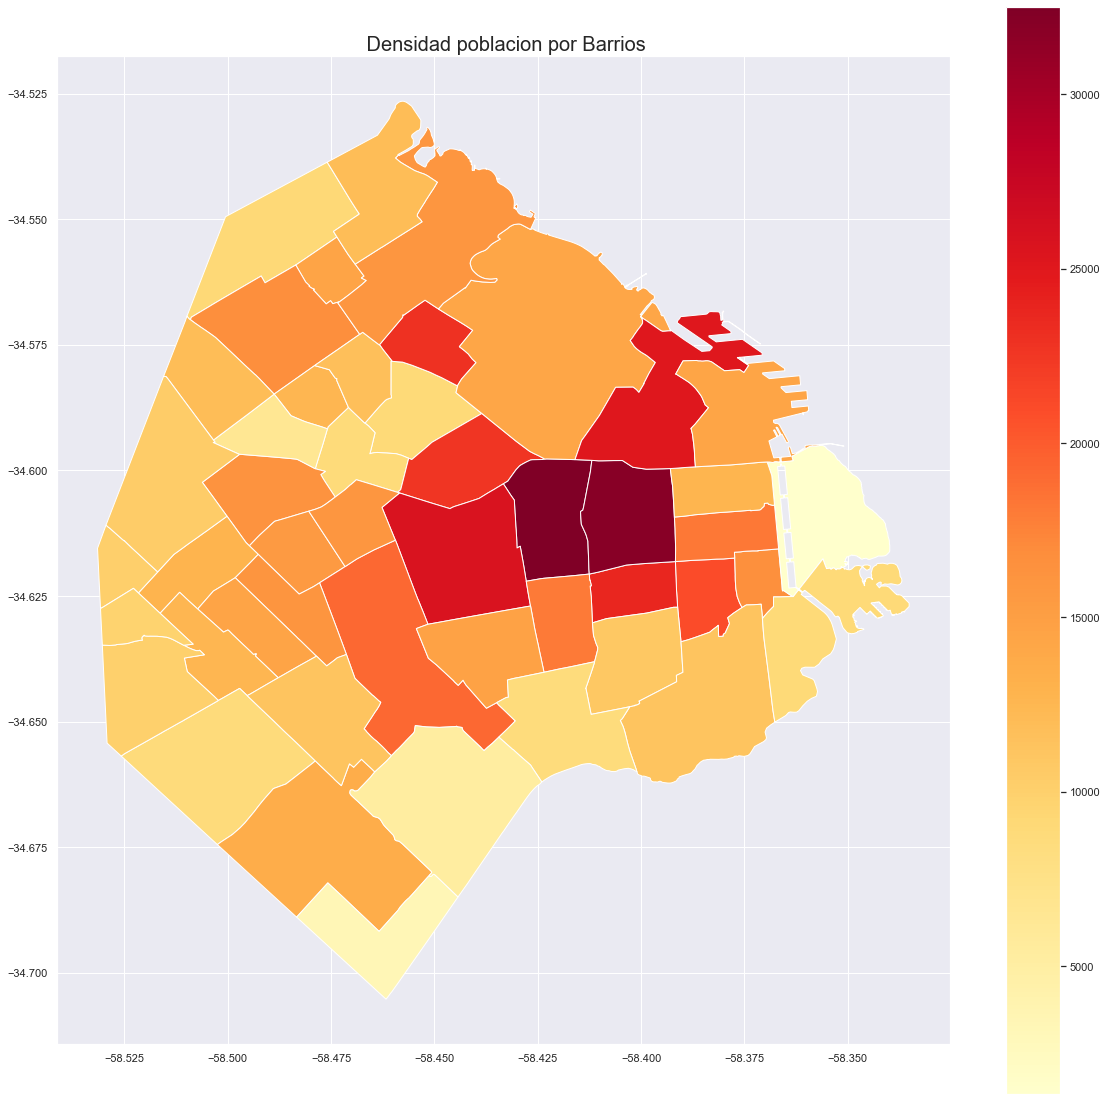

In [57]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    plt.title(' Densidad poblacion por Barrios', size = 20)
    barrios_caba_map.plot(column="densidad_pobacional",ax=ax,legend=True,cmap='YlOrRd')

## HeatMap de Barrios contagiados

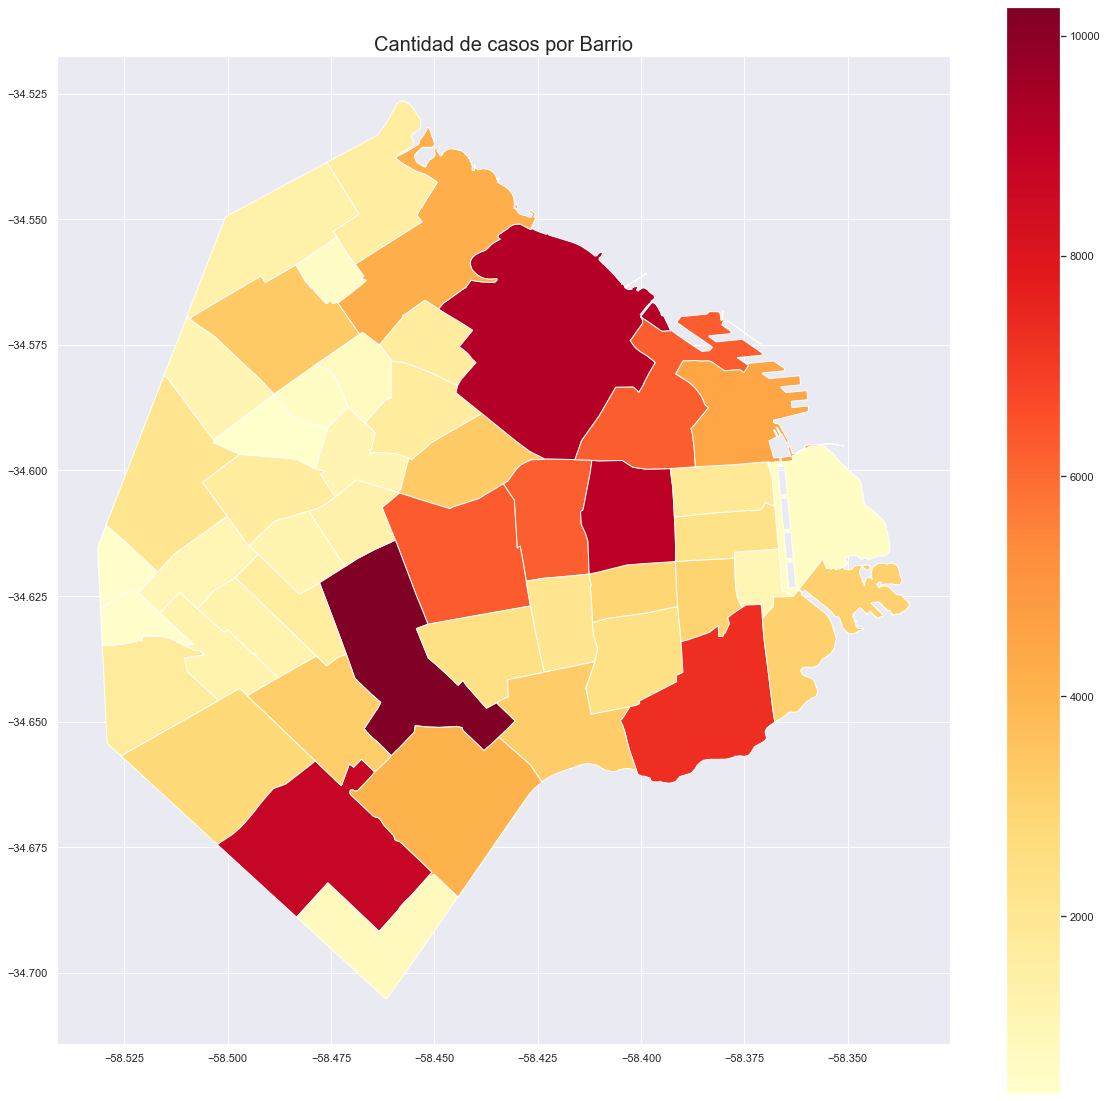

In [58]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])

    plt.title('Cantidad de casos por Barrio', size = 20)
    barrios_caba_map.plot(column="casos",ax=ax,legend=True,cmap='YlOrRd')


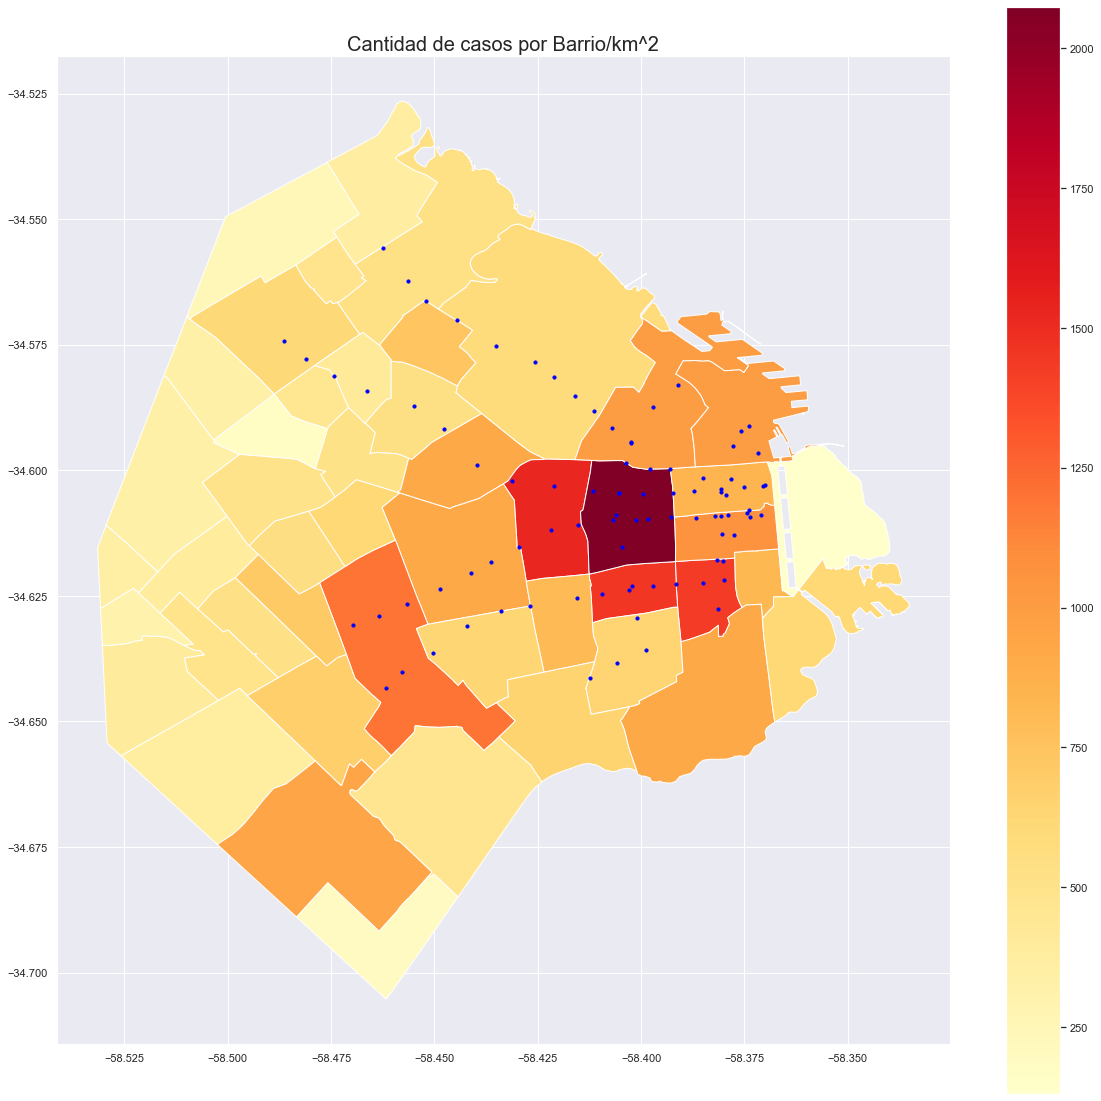

In [59]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    gis_ba_map = barrios_caba_map.plot(column="densidad_covid",ax=ax,legend=True,cmap='YlOrRd')
    plt.title('Cantidad de casos por Barrio/km^2', size = 20)
    ba_subte_map.plot(ax=gis_ba_map,color='blue',markersize=10)

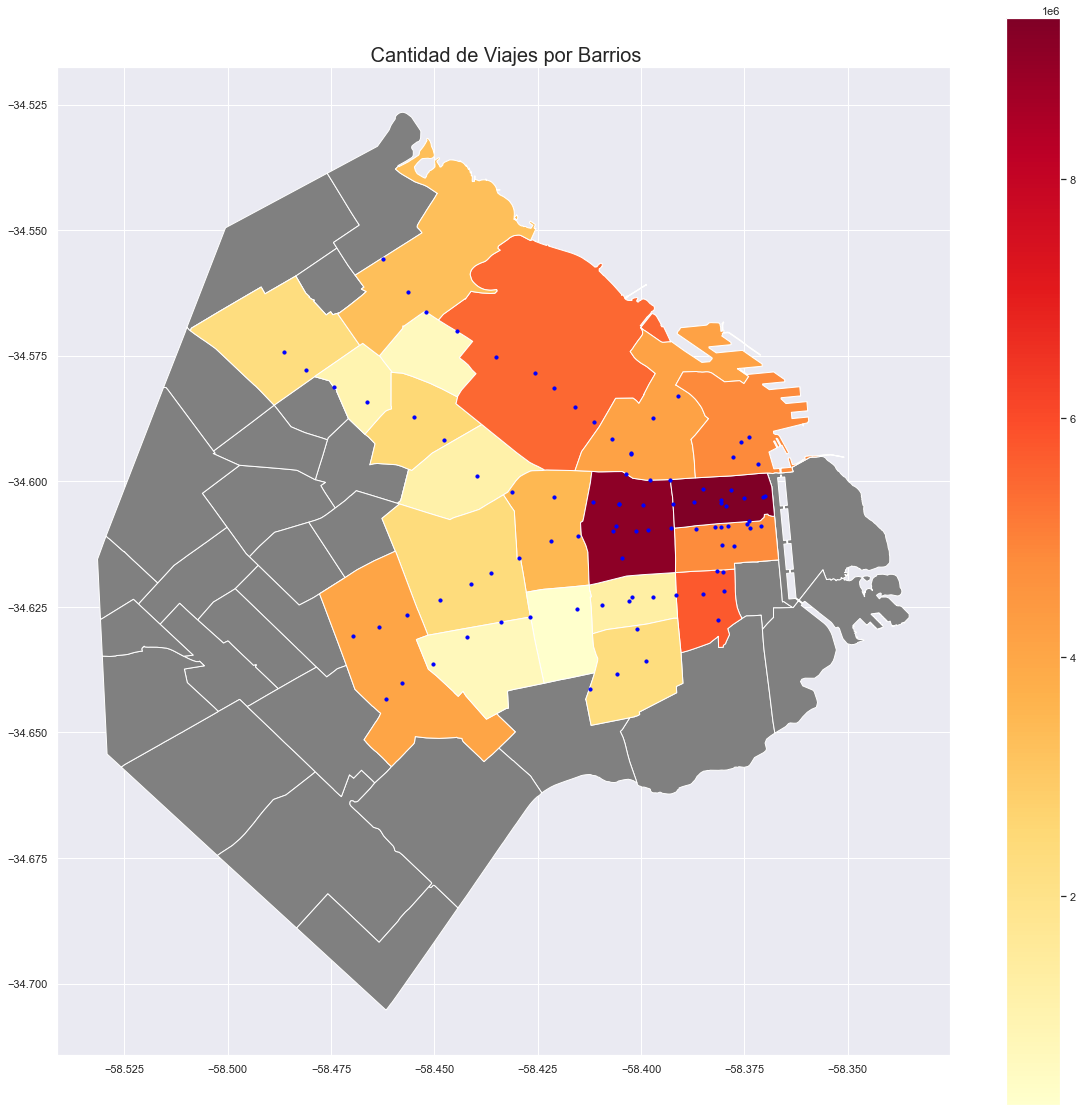

In [60]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    gis_bap_map = barrios_caba_map.plot(ax=ax,color='grey')

    gis_ba_map = barrios_caba_map.plot(column="pasajeros",ax=gis_bap_map,legend=True,cmap='YlOrRd')
    plt.title(' Cantidad de Viajes por Barrios', size = 20)
    ba_subte_map.plot(ax=gis_ba_map,color='blue',markersize=10)

In [61]:
covid_palermo_df = covid_caba_df[(covid_caba_df.barrio == 'PALERMO') 
                                   & (covid_df.clasificacion == 'confirmado') 
                                   & (covid_df.fecha_toma_muestra > '2020-01-01')]
group_covidBypalermo_df = covid_palermo_df.groupby(["fecha_toma_muestra"])["barrio"].count().reset_index(name='casos')

indexMuestraPalermo = group_covidBypalermo_df.set_index(['fecha_toma_muestra'])



<ipython-input-61-c6ca4ce296bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_palermo_df = covid_caba_df[(covid_caba_df.barrio == 'PALERMO')


In [62]:
covid_balvanera_df = covid_caba_df[(covid_caba_df.barrio == 'BALVANERA') 
                                   & (covid_df.clasificacion == 'confirmado') 
                                   & (covid_df.fecha_toma_muestra > '2020-01-01')]
group_covidBybalvanera_df = covid_balvanera_df.groupby(["fecha_toma_muestra"])["barrio"].count().reset_index(name='casos')

indexMuestraBalvanera = group_covidBybalvanera_df.set_index(['fecha_toma_muestra'])

<ipython-input-62-c0f425a14fc8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_balvanera_df = covid_caba_df[(covid_caba_df.barrio == 'BALVANERA')


In [63]:
clima_caba_df = clima_caba_df[clima_caba_df.Fecha > '2020-03-01']
indexM=clima_caba_df.set_index(['Fecha'])
rolweathermean = indexM.rolling(window=12).mean()

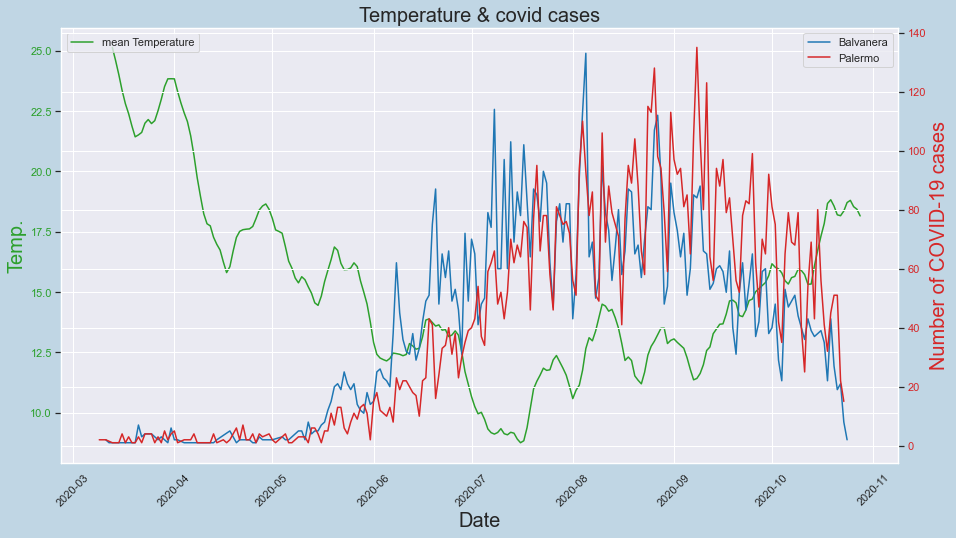

In [64]:

fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
fig.patch.set_facecolor('#c0d6e4')
color = 'tab:green'
ax1.set_xlabel('Date', size=20)
ax1.set_ylabel('Temp.', color=color,size=20)
plt.plot(rolweathermean['tProm'],color=color, label='mean Temperature')
ax1.legend(loc="upper left")
ax1.tick_params(axis='y', labelcolor=color)

#ax1.annotate('Temp. minima 8.75ºC', xy=('2020-07-16', 8.75), xytext=('2020-08-01', 8),size = 20,
            #arrowprops=dict(facecolor='black', shrink=0.05))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of COVID-19 cases', color=color,size=20)  # we already handled the x-label with ax1
ax2.plot(indexMuestraBalvanera, color=color, label='Balvanera')
ax2.legend(loc="upper right")
ax2.tick_params(axis='y', labelcolor=color)

#ax2.annotate('133 COVID-19 cases', xy=('2020-08-05', 133), xytext=('2020-05-01', 120),size = 20,
            #arrowprops=dict(facecolor='black', shrink=0.05))

color = 'tab:red'
ax2.set_ylabel('Number of COVID-19 cases', color=color,size=20)  # we already handled the x-label with ax1
ax2.plot(indexMuestraPalermo, color=color, label='Palermo')
ax2.legend(loc="upper right")
ax2.tick_params(axis='y', labelcolor=color)


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.title('Temperature & covid cases', size = 20)

plt.show()